## Medidas de proximidade

In [3]:
!python3 -m pip install -r ../requirements.txt

In [4]:
import numpy as np
import pandas as pd
from sklearn.metrics import pairwise_distances

X = np.array([[2,3,3], [3,5,4], [10,8,8], [9,9,8], [5,6,5]])
dfX = pd.DataFrame(X, columns=['Nota1','Nota2','Nota3'], index=['aluno1','aluno2','aluno3','aluno4', 'aluno5'])
dfX

,Nota1,Nota2,Nota3
aluno1,2,3,3
aluno2,3,5,4
aluno3,10,8,8
aluno4,9,9,8
aluno5,5,6,5


In [5]:
pairwise_distances(dfX, metric='euclidean')

array([[ 0.        ,  2.44948974, 10.67707825, 10.48808848,  4.69041576],
       [ 2.44948974,  0.        ,  8.60232527,  8.24621125,  2.44948974],
       [10.67707825,  8.60232527,  0.        ,  1.41421356,  6.164414  ],
       [10.48808848,  8.24621125,  1.41421356,  0.        ,  5.83095189],
       [ 4.69041576,  2.44948974,  6.164414  ,  5.83095189,  0.        ]])

In [6]:
print(pairwise_distances(dfX, metric='cosine'))

[[0.00000000e+00 5.01256289e-03 3.98697590e-02 2.14488520e-02
  1.14289468e-02]
 [5.01256289e-03 1.11022302e-16 4.46824722e-02 2.16502969e-02
  8.75929284e-03]
 [3.98697590e-02 4.46824722e-02 0.00000000e+00 4.39562567e-03
  1.44868189e-02]
 [2.14488520e-02 2.16502969e-02 4.39562567e-03 0.00000000e+00
  2.96281680e-03]
 [1.14289468e-02 8.75929284e-03 1.44868189e-02 2.96281680e-03
  1.11022302e-16]]


#### Entre dois pontos

In [7]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarity([[1, 0, -1]], [[-1,-1, 0]])

array([[-0.5]])

In [8]:
from sklearn.metrics.pairwise import euclidean_distances

euclidean_distances([[1, 0, -1]], [[-1,-1, 0]])

array([[2.44948974]])

### Importância da distância Mahalanobis em uma estratégia de Outlier detection

#### Introduzindo ruídos artificialmente (dataset Iris)

In [ ]:
import random
import pandas as pd
from random import uniform

random.seed(10)

dfIris = pd.read_csv('../data/Iris.csv').set_index('Id')

#Adicionando ruídos
new_rows = []
for i in range(1,5):
    new_row = {
        'SepalLengthCm': dfIris.iloc[i,0],
        'SepalWidthCm': dfIris.iloc[i,1],
        'PetalLengthCm': dfIris.iloc[i,2] + 2 * uniform(1, max(dfIris['PetalLengthCm'])),
        'PetalWidthCm': dfIris.iloc[i,3] + 2 * uniform(1, max(dfIris['PetalWidthCm'])),
        'Species': 'noise'
    }
    new_rows.append(new_row)

dfIris = pd.concat([dfIris, pd.DataFrame(new_rows)], ignore_index=True)

X = dfIris.iloc[:,0:4]

dfIris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.400000,0.200000,Iris-setosa
1,4.9,3.0,1.400000,0.200000,Iris-setosa
2,4.7,3.2,1.300000,0.200000,Iris-setosa
3,4.6,3.1,1.500000,0.200000,Iris-setosa
4,5.0,3.6,1.400000,0.200000,Iris-setosa
...,...,...,...,...,...
149,5.9,3.0,5.100000,1.800000,Iris-virginica
150,4.9,3.0,10.142551,3.486667,noise
151,4.7,3.2,10.121477,2.818295,noise
152,4.6,3.1,13.097191,4.670767,noise


In [13]:
from sklearn.covariance import EllipticEnvelope

# O predict retorna 1 para inliers (não outliers) e -1 para outliers
EllipticEnvelope(random_state=10, contamination=0.02).fit_predict(X)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,
       -1])

#### Mostrando as distâncias Mahalanobis

In [ ]:
model = EllipticEnvelope(random_state=10, contamination=0.02).fit(X)

print(model.dist_)

[2.31113852e+00 3.09636727e+00 2.30851982e+00 2.65550097e+00
 2.82608150e+00 5.16729608e+00 3.32952309e+00 1.89454475e+00
 4.28911262e+00 2.23601405e+00 4.31436444e+00 3.17072366e+00
 2.50331452e+00 4.58583387e+00 1.14641236e+01 1.34300094e+01
 7.24438677e+00 2.62121985e+00 6.33412737e+00 4.24089018e+00
 3.14355102e+00 3.46231057e+00 4.28319544e+00 2.92366986e+00
 6.93688843e+00 2.31957806e+00 2.01798150e+00 2.48834755e+00
 2.64750852e+00 2.62103976e+00 1.93007280e+00 5.64818077e+00
 1.25649251e+01 1.05299456e+01 2.23601405e+00 3.96917474e+00
 6.22048276e+00 2.23601405e+00 4.07348279e+00 1.95821721e+00
 2.98776729e+00 1.74462808e+01 3.97276235e+00 5.18279331e+00
 5.88013069e+00 3.94854859e+00 6.12679512e+00 2.58328322e+00
 3.93590967e+00 1.90540610e+00 8.41692544e+00 1.53386062e+00
 6.05333396e+00 4.99042991e+00 2.88527060e+00 4.49953066e+00
 2.23951869e+00 6.05074772e+00 4.99285176e+00 4.29956181e+00
 1.04968476e+01 4.76525010e-01 8.57315805e+00 2.76252975e+00
 1.63295597e+00 4.589494

### Cálculo de distâncias com dados categóricos (qualitativos)

In [14]:
df = pd.DataFrame({'col1':[1,2,3,4,5], 'col2':list('abcab')})

#define o tipo categórico para a coluna 2
df['col2'] = df['col2'].astype('category')

df

,col1,col2
0,1,a
1,2,b
2,3,c
3,4,a
4,5,b


In [ ]:
dummies = pd.get_dummies(df['col2'])

df_dummies = df.join(dummies)
df_dummies.drop('col2', axis=1)

,col1,a,b,c
0,1,1,0,0
1,2,0,1,0
2,3,0,0,1
3,4,1,0,0
4,5,0,1,0


In [ ]:
#Pega códigos numéricos para as categorias
print(df['col2'].cat.codes)

df['col2'] = df['col2'].cat.codes

0    0
1    1
2    2
3    0
4    1
dtype: int8


In [ ]:
df

,col1,col2
0,1,0
1,2,1
2,3,2
3,4,0
4,5,1


## Normalização

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

dfWine = pd.read_csv('wine_data.csv', header=None, usecols=[1,2])

dfWine.columns=['Alcohol', 'Malic acid']

dfWine.head()

,Alcohol,Malic acid
0,14.23,1.71
1,13.20,1.78
2,13.16,2.36
3,14.37,1.95
4,13.24,2.59


#### Normalização z-score

In [ ]:
#define a forma de normalização
std_scaler = preprocessing.StandardScaler()

#realiza a normalização
zscoreNorm = std_scaler.fit_transform(dfWine[['Alcohol', 'Malic acid']])

dfZscore = pd.DataFrame(zscoreNorm, columns = ['Alcohol','Malic acid'])

print('Média depois da normalização z-score:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(dfZscore['Alcohol'].mean(), dfZscore['Malic acid'].mean()))
print('\nDesvio padrão depois da normalização z-score:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(dfZscore['Alcohol'].std(), dfZscore['Malic acid'].std()))


Média depois da normalização z-score:
Alcohol=-0.00, Malic acid=-0.00

Desvio padrão depois da normalização z-score:
Alcohol=1.00, Malic acid=1.00


#### Normalização min-max

In [ ]:
minmax_scaler = preprocessing.MinMaxScaler()
minmax = minmax_scaler.fit_transform(dfWine[['Alcohol', 'Malic acid']])

dfMinmax = pd.DataFrame(minmax, columns = ['Alcohol','Malic acid'])

print('Valor mínimo depois de min-max:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(dfMinmax['Alcohol'].min(), dfMinmax['Malic acid'].min()))
print('\nValor máximo depois de min-max:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(dfMinmax['Alcohol'].max(), dfMinmax['Malic acid'].max()))


Valor mínimo depois de min-max:
Alcohol=0.00, Malic acid=0.00

Valor máximo depois de min-max:
Alcohol=1.00, Malic acid=1.00


#### Visualizando

       Alcohol  Malic acid   dataset
0    14.230000    1.710000  Original
1    13.200000    1.780000  Original
2    13.160000    2.360000  Original
3    14.370000    1.950000  Original
4    13.240000    2.590000  Original
..         ...         ...       ...
173   0.705263    0.970356    MinMax
174   0.623684    0.626482    MinMax
175   0.589474    0.699605    MinMax
176   0.563158    0.365613    MinMax
177   0.815789    0.664032    MinMax

[534 rows x 3 columns]


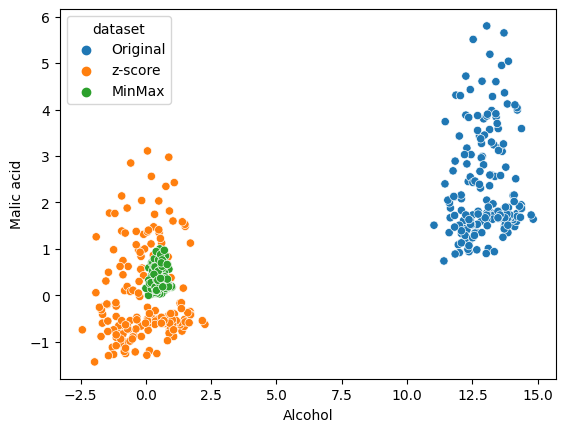

In [ ]:
import seaborn as sns

#concatena os datasets
concatenated = pd.concat([dfWine.assign(dataset='Original'), dfZscore.assign(dataset='z-score'), dfMinmax.assign(dataset='MinMax')])

sns.scatterplot(data=concatenated, x="Alcohol", y="Malic acid", hue='dataset')

print(concatenated)


#### Um pequeno exemplo sobre a influência de features com valores discrepantes das demais

In [ ]:
from sklearn.metrics import pairwise_distances

minmax_scaler = preprocessing.MinMaxScaler()

A = np.array([[3.9,5,3000], [5,5.5,3500], [10,6,3500]])


print('Objetos')
print(A)
print('---')

A_norm = minmax_scaler.fit_transform(A)


print('Normalizados')
print(A_norm)


print('Distâncias entre os não normalizados')
print(pairwise_distances(A, metric='euclidean'))

print('Distâncias entre os normalizados')
print(pairwise_distances(A_norm,  metric='euclidean'))

Objetos
[[   3.9    5.  3000. ]
 [   5.     5.5 3500. ]
 [  10.     6.  3500. ]]
---
Normalizados
[[0.         0.         0.        ]
 [0.18032787 0.5        1.        ]
 [1.         1.         1.        ]]
Distâncias entre os não normalizados
[[  0.         500.00146    500.03820854]
 [500.00146      0.           5.02493781]
 [500.03820854   5.02493781   0.        ]]
Distâncias entre os normalizados
[[0.         1.13248317 1.73205081]
 [1.13248317 0.         0.96013666]
 [1.73205081 0.96013666 0.        ]]


## PCA - Principal Componente Analysis

In [ ]:
# Carregando todas as features do dataset wine
df = pd.read_csv('wine_data.csv', header=None)

df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [ ]:
#Carregando somente as features do dataset wine, sem as classes (coluna 0)
dfAllFeatures = df.iloc[:,1:]

dfAllFeatures

,1,2,3,4,5,6,7,8,9,10,11,12,13
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [ ]:
#Somente as classes
dfClasses = df.iloc[:,0]
dfClasses

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: 0, Length: 178, dtype: int64

In [ ]:
#Normalização
std_scaler = preprocessing.StandardScaler()

dfAllFeatures_norm = std_scaler.fit_transform(dfAllFeatures)

#### Aplicando o PCA no conjunto sem e com normalização

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns

# Nos dados originais
pca = PCA(n_components=2)
X = pca.fit_transform(dfAllFeatures)


# Nos dados normalizados
pca_std = PCA(n_components=2)
X_std = pca_std.fit_transform(dfAllFeatures_norm)

In [ ]:
#Cria um dataframe com os dados sem normalização do PCA
dfNoScale = pd.DataFrame(X, columns = ['PC1','PC2'])
dfNoScale['Classes'] = dfClasses

dfNoScale

,PC1,PC2,Classes
0,318.562979,21.492131,1
1,303.097420,-5.364718,1
2,438.061133,-6.537309,1
3,733.240139,0.192729,1
4,-11.571428,18.489995,1
...,...,...,...
173,-6.980211,-4.541137,3
174,3.131605,2.335191,3
175,88.458074,18.776285,3
176,93.456242,18.670819,3


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

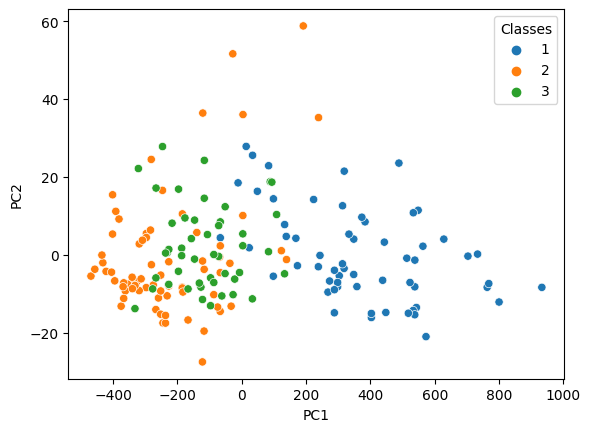

In [ ]:
#Visualização dos dois PCs - classes foram adicionadas em cores
sns.scatterplot(data=dfNoScale, x="PC1", y="PC2", hue='Classes', palette='tab10')

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

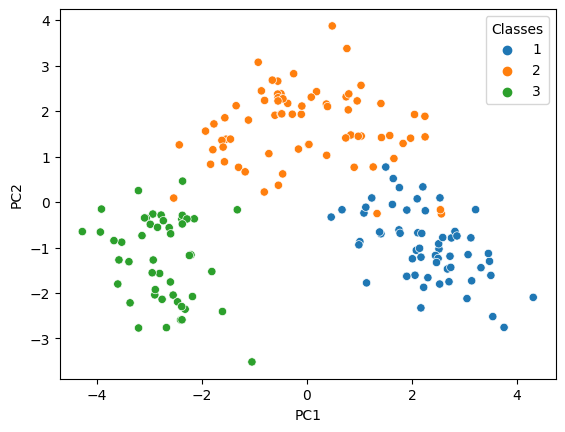

In [ ]:
#Cria um dataframe com os dados com normalização do PCA
dfWithScale = pd.DataFrame(X_std, columns = ['PC1','PC2'])
dfWithScale['Classes'] = dfClasses

dfWithScale

#Visualiza os dados - Note como a separação de classes fica melhor depois dos dados normalizados.
sns.scatterplot(data=dfWithScale, x="PC1", y="PC2", hue='Classes', palette='tab10')